# Neural Network Classifier Results
This notebook evaluates a neural network implemented from scratch in NumPy.
Here we test multiple architectures, learning rates, and regularization strengths on three datasets:
**House Votes**, **Wine**, and **Cancer**.

Each dataset section includes:
- Grid search over model hyperparameters
- Metrics (Accuracy, Precision, Recall, F1)
- Plots for training curve and confusion matrix

## Setup

In [ ]:
import model
import utils

import sklearn.model_selection
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
from tqdm import tqdm
import copy

import importlib

In [ ]:
importlib.reload(model)
importlib.reload(utils)

<module 'utils' from '/content/utils.py'>

## Dataset Overview

We evaluate on three datasets:

1. **House Votes 84**:  Binary classification of party affiliation based on the 1984 U.S. congressional voting records for House members.
2. **Wine Quality**:  Multiclass classification of wine cultivars using 13 continuous chemical measurements.
3. **Breast Cancer**:  binary classification of tumors as malignant/benign based on cell measurements.

Below we preprocess and preview each dataset before training.


In [ ]:
house_votes_data = pd.read_csv("house_votes_84.csv")
wine_data = pd.read_csv("wine.csv", sep="\t")
cancer_data = pd.read_csv("cancer.csv", sep="\t")

wine_data_processed = utils.preprocess_data(wine_data, class_column = "# class", normalize = True)
cancer_data_processed = utils.preprocess_data(cancer_data, class_column = "Class", normalize = True)

ohe = OneHotEncoder()
transformed_house_votes = ohe.fit_transform(house_votes_data).toarray()
house_votes_data_processed = pd.DataFrame(data = transformed_house_votes)

In [ ]:
display(house_votes_data.head(), wine_data.head(), cancer_data.head())

,#handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-adi,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,class
0,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2,1
1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0,1
2,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1,0
3,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2,0
4,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2,0


,# class,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,0,3.0,1.0,1.0,0
1,5.0,4.0,4.0,5.0,7.0,1,3.0,2.0,1.0,0
2,3.0,1.0,1.0,1.0,2.0,2,3.0,1.0,1.0,0
3,6.0,8.0,8.0,1.0,3.0,4,3.0,7.0,1.0,0
4,4.0,1.0,1.0,3.0,2.0,0,3.0,1.0,1.0,0


## House Votes Dataset
Target: party affiliation (Democrat vs Republican).

In [ ]:
layer_configs = [
    [48, 4, 2],
    [48, 12, 2],
    [48, 16, 8, 2]
]

house_results_df = utils.evaluate_networks(
    dataset = house_votes_data_processed,
    architectures = layer_configs,
    alphas = [0.05, 0.02, 0.01],
    regularizers = [0.0001, 0.001, 0.01, 0.1],
    epochs = 50,
    k_folds = 10,
    test_size = 0.4,
    stratify = False,
    sort_by = 'F1'
)

Layer Configurations: 100%|██████████| 3/3 [01:25<00:00, 28.42s/it]


In [ ]:
house_results_df

,Num Hidden Layers,Architecture,Alpha,Regularizer,Epochs,Folds,Test Size,Accuracy,Precision,Recall,F1,Stratified
0,1,"[48, 12, 2]",0.02,0.0010,50,10,0.4,0.9828,0.9854,0.9797,0.9823,False
1,1,"[48, 12, 2]",0.01,0.0010,50,10,0.4,0.9770,0.9738,0.9785,0.9760,False
2,2,"[48, 16, 8, 2]",0.02,0.0001,50,10,0.4,0.9770,0.9756,0.9756,0.9756,False
3,1,"[48, 4, 2]",0.01,0.0001,50,10,0.4,0.9655,0.9689,0.9608,0.9643,False
4,1,"[48, 4, 2]",0.02,0.0100,50,10,0.4,0.9655,0.9663,0.9612,0.9636,False
5,1,"[48, 4, 2]",0.01,0.0010,50,10,0.4,0.9655,0.9663,0.9608,0.9634,False
6,1,"[48, 12, 2]",0.05,0.0010,50,10,0.4,0.9655,0.9608,0.9663,0.9634,False
7,1,"[48, 12, 2]",0.01,0.0100,50,10,0.4,0.9655,0.9696,0.9575,0.9629,False
8,1,"[48, 12, 2]",0.05,0.0001,50,10,0.4,0.9655,0.9658,0.9588,0.9621,False
9,2,"[48, 16, 8, 2]",0.01,0.0100,50,10,0.4,0.9655,0.9609,0.9609,0.9609,False


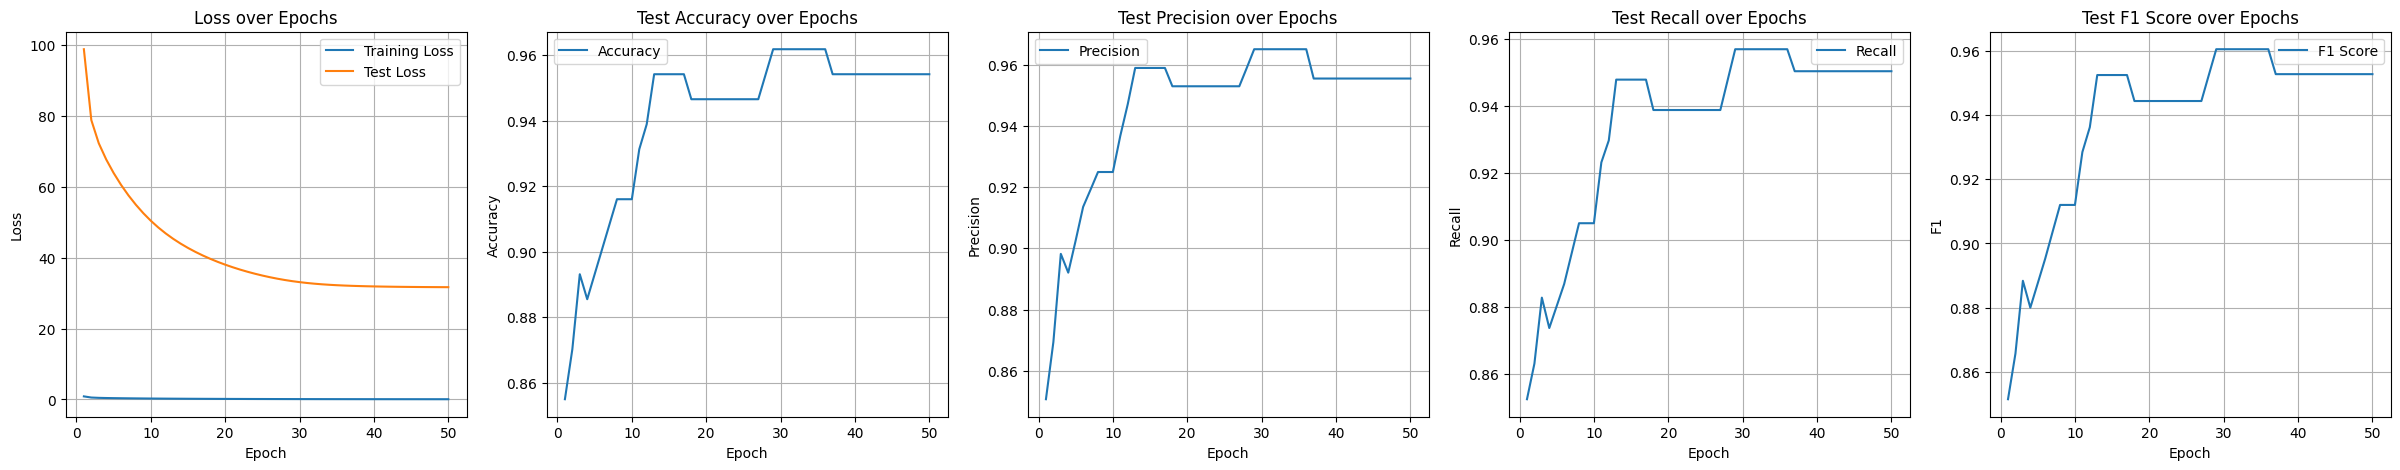

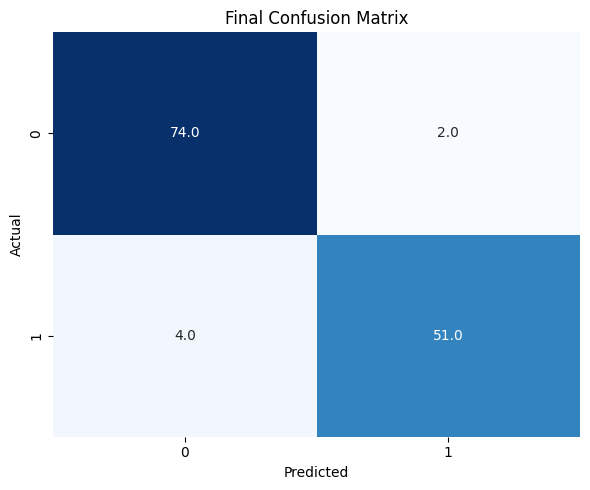

Training Size: 100%|██████████| 9/9 [00:18<00:00,  2.08s/it]


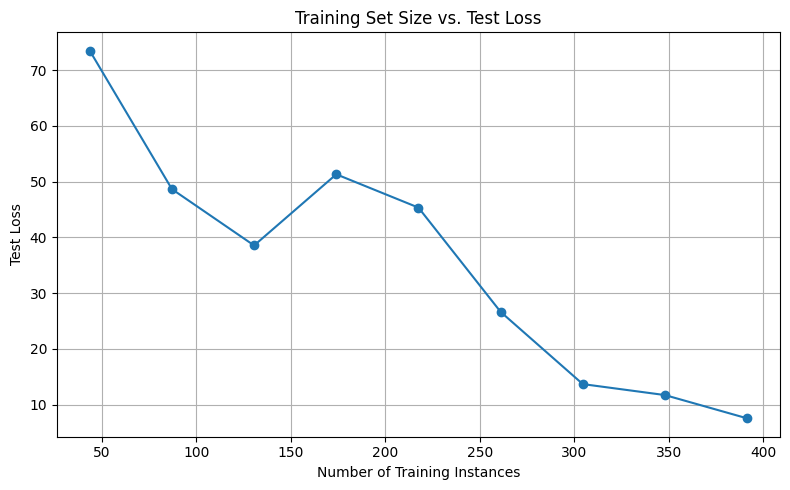

In [ ]:
best_house_data_nn = model.NeuralNetwork(layers = [48, 12, 2], alpha = 0.02, regularizer = 0.001, epochs = 50, k_folds = 10, data = house_votes_data_processed)

train_x, train_y, test_x, test_y = best_house_data_nn.fit(test_size=0.3, shuffle=True)
best_house_data_nn.SGD(train_x=train_x, train_y=train_y, test_x=test_x, test_y=test_y)

utils.plot_training_metrics(best_house_data_nn)
utils.plot_learning_curve(best_house_data_nn)



## Wine Dataset
Target: cultivar class

In [ ]:
layer_configs = [
    [13, 16, 8, 3],
    [13, 32, 16, 8, 3],
    [13, 24, 12, 3]
]

wine_results_df = utils.evaluate_networks(
    dataset = wine_data_processed,
    architectures = layer_configs,
    alphas = [0.05, 0.02, 0.01],
    regularizers = [0.0001, 0.001, 0.01, 0.1],
    epochs = 50,
    k_folds = 10,
    test_size = 0.4,
    stratify = True,
    sort_by = 'F1'
)

In [ ]:
wine_results_df

,Num Hidden Layers,Architecture,Alpha,Regularizer,Epochs,Folds,Test Size,Accuracy,Precision,Recall,F1,Stratified
0,2,"[13, 16, 8, 3]",0.05,0.0010,50,10,0.4,0.9889,0.9911,0.9897,0.9896,True
1,2,"[13, 16, 8, 3]",0.05,0.0100,50,10,0.4,0.9889,0.9903,0.9897,0.9892,True
2,3,"[13, 32, 16, 8, 3]",0.02,0.0010,50,10,0.4,0.9889,0.9903,0.9897,0.9892,True
3,2,"[13, 16, 8, 3]",0.05,0.0001,50,10,0.4,0.9833,0.9863,0.9849,0.9845,True
4,2,"[13, 24, 12, 3]",0.02,0.0100,50,10,0.4,0.9833,0.9855,0.9849,0.9840,True
5,3,"[13, 32, 16, 8, 3]",0.05,0.0001,50,10,0.4,0.9833,0.9855,0.9849,0.9840,True
6,2,"[13, 24, 12, 3]",0.05,0.0001,50,10,0.4,0.9833,0.9855,0.9849,0.9840,True
7,2,"[13, 24, 12, 3]",0.05,0.0100,50,10,0.4,0.9836,0.9869,0.9836,0.9840,True
8,3,"[13, 32, 16, 8, 3]",0.05,0.0010,50,10,0.4,0.9836,0.9880,0.9822,0.9838,True
9,2,"[13, 24, 12, 3]",0.02,0.0001,50,10,0.4,0.9833,0.9861,0.9830,0.9832,True


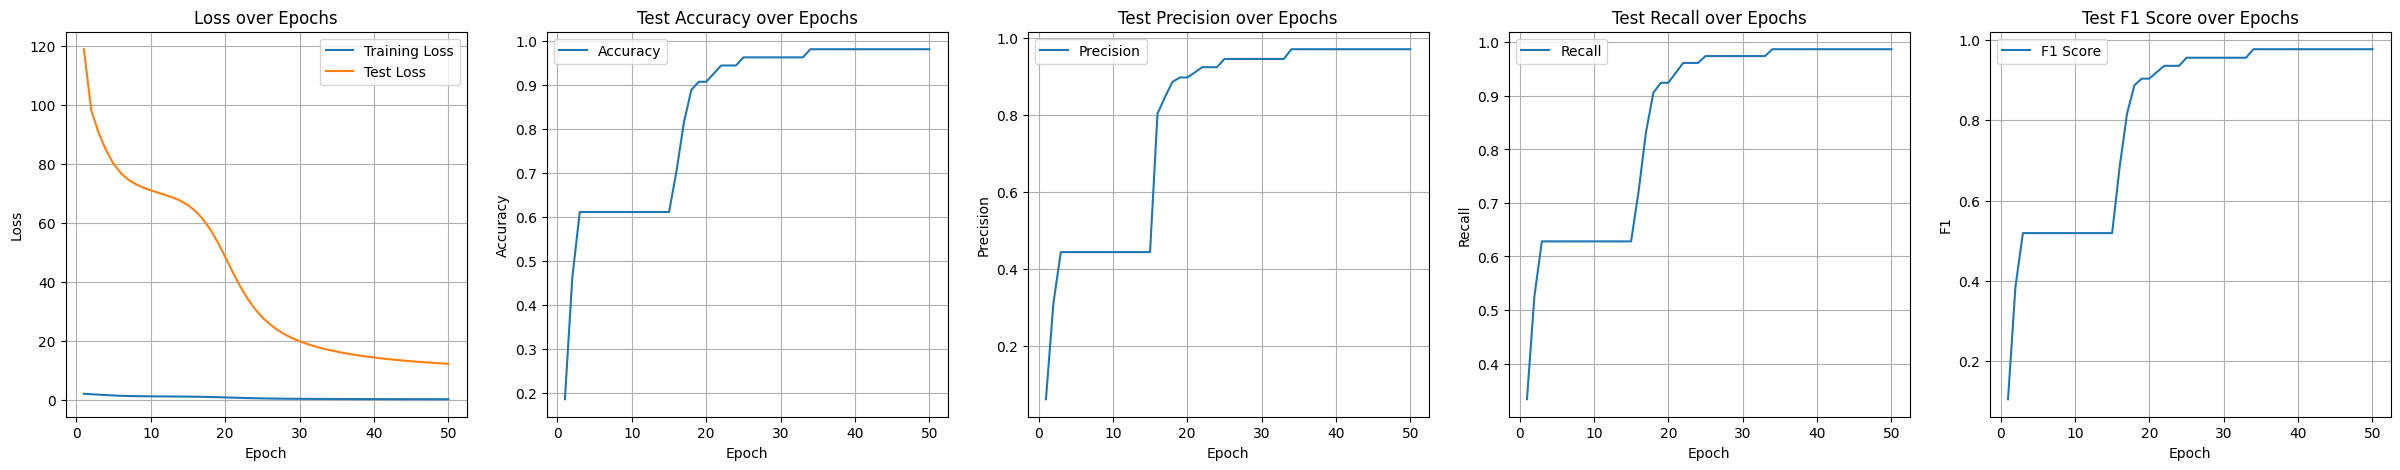

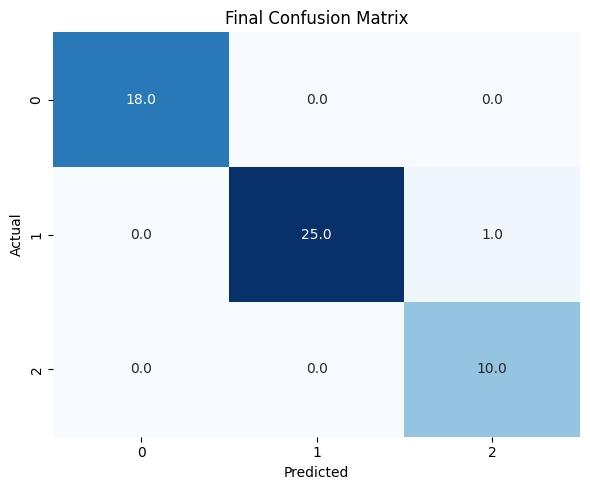

Training Size: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]


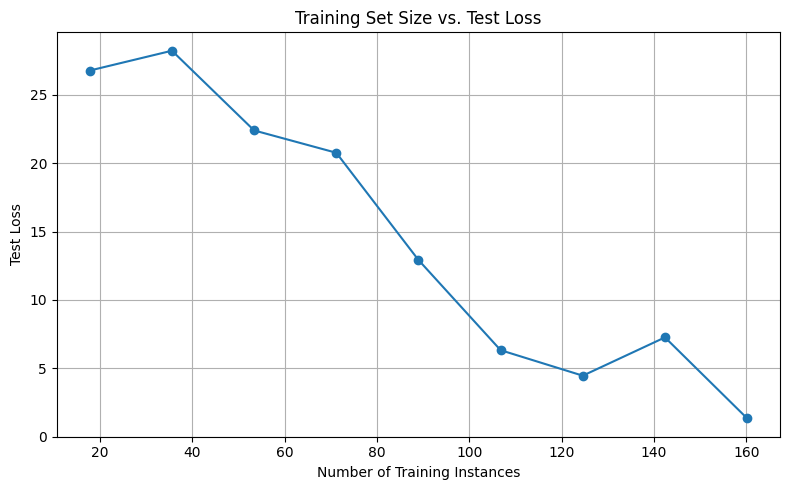

In [ ]:
best_wine_data_nn = model.NeuralNetwork(layers = [13, 16, 8, 3], alpha = 0.05, regularizer = 0.001, epochs = 50, k_folds = 10, data = wine_data_processed)

train_x, train_y, test_x, test_y = best_wine_data_nn.fit(test_size=0.3, shuffle=True)
best_wine_data_nn.SGD(train_x=train_x, train_y=train_y, test_x=test_x, test_y=test_y)

utils.plot_training_metrics(best_wine_data_nn)
utils.plot_learning_curve(best_wine_data_nn)

## Breast Cancer Dataset
Target: tumor malignancy.

In [ ]:
layer_configs = [
    [9, 6, 2],
    [9, 8, 4, 2],
    [9, 12, 6, 2]
]

cancer_results_df = utils.evaluate_networks(
    dataset = cancer_data_processed,
    architectures = layer_configs,
    alphas = [0.05, 0.02, 0.01],
    regularizers = [0.0001, 0.001, 0.01, 0.1],
    epochs = 50,
    k_folds = 10,
    test_size = 0.4,
    stratify = True,
    sort_by = 'F1'
)

In [ ]:
cancer_results_df

,Num Hidden Layers,Architecture,Alpha,Regularizer,Epochs,Folds,Test Size,Accuracy,Precision,Recall,F1,Stratified
0,2,"[9, 12, 6, 2]",0.05,0.0100,50,10,0.4,0.9686,0.9604,0.9740,0.9660,True
1,2,"[9, 8, 4, 2]",0.05,0.0010,50,10,0.4,0.9672,0.9598,0.9710,0.9644,True
2,2,"[9, 8, 4, 2]",0.02,0.0010,50,10,0.4,0.9672,0.9610,0.9690,0.9643,True
3,2,"[9, 12, 6, 2]",0.05,0.0001,50,10,0.4,0.9672,0.9610,0.9690,0.9643,True
4,2,"[9, 8, 4, 2]",0.05,0.0001,50,10,0.4,0.9671,0.9609,0.9690,0.9642,True
5,1,"[9, 6, 2]",0.02,0.0001,50,10,0.4,0.9657,0.9593,0.9679,0.9627,True
6,2,"[9, 12, 6, 2]",0.01,0.0010,50,10,0.4,0.9643,0.9587,0.9648,0.9610,True
7,2,"[9, 12, 6, 2]",0.01,0.0001,50,10,0.4,0.9643,0.9588,0.9648,0.9610,True
8,2,"[9, 12, 6, 2]",0.02,0.0001,50,10,0.4,0.9643,0.9597,0.9638,0.9609,True
9,1,"[9, 6, 2]",0.05,0.0010,50,10,0.4,0.9629,0.9538,0.9697,0.9601,True


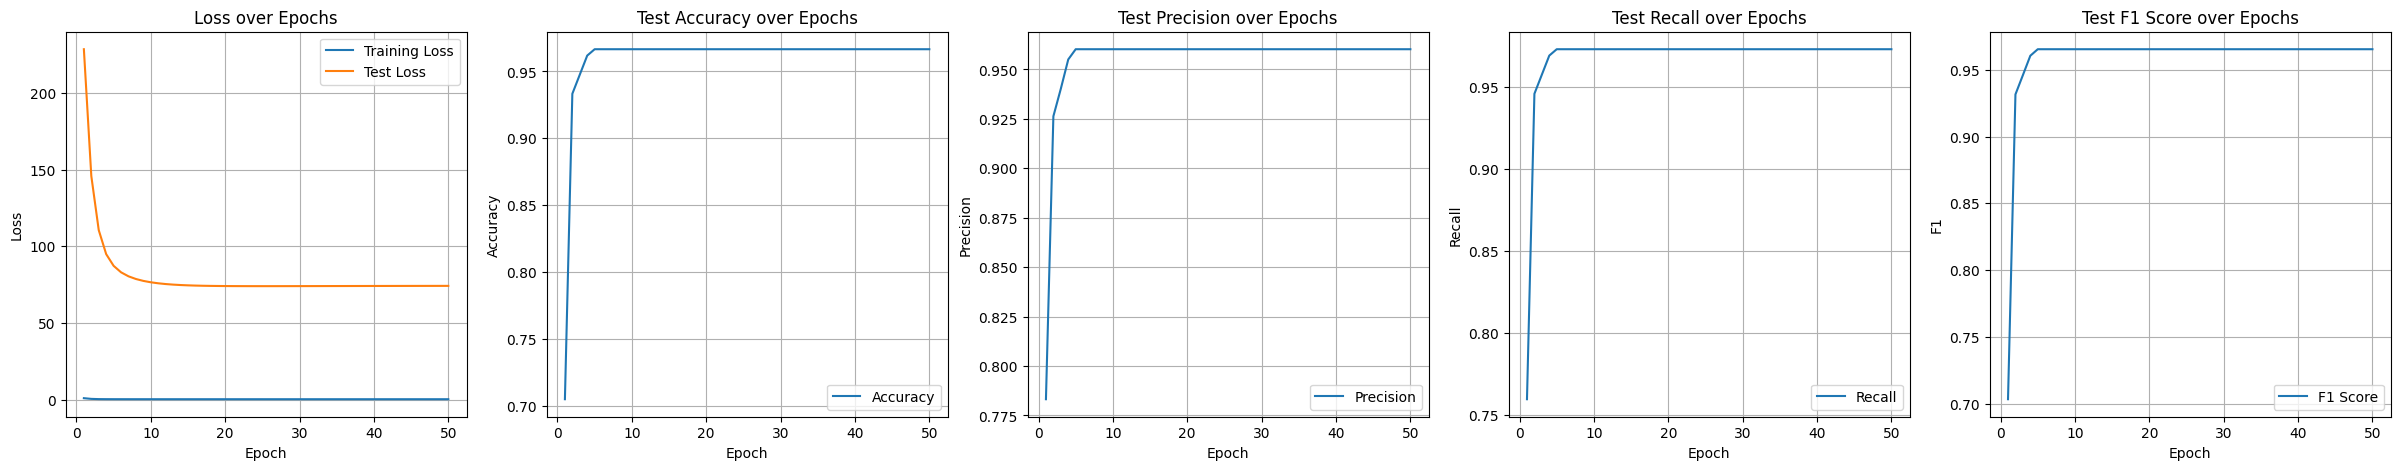

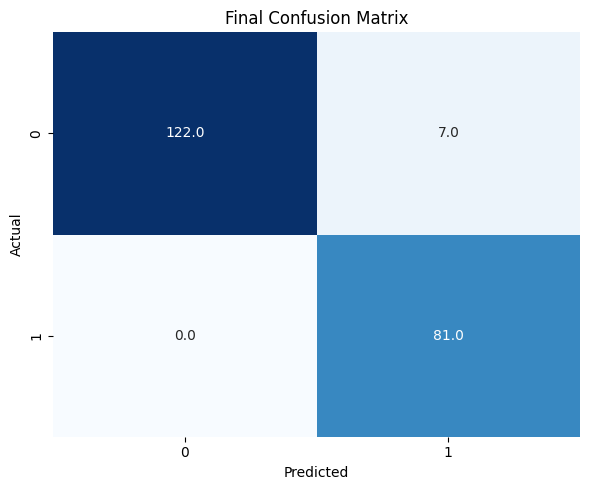

Training Size: 100%|██████████| 9/9 [00:33<00:00,  3.77s/it]


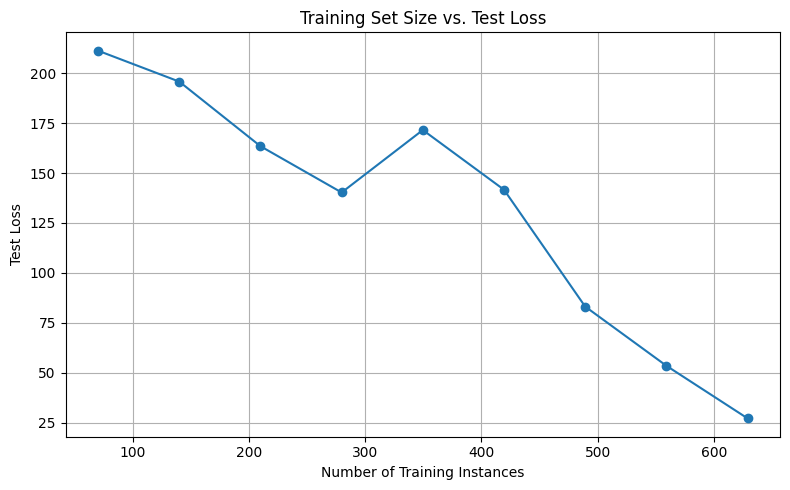

In [ ]:
best_cancer_data_nn = model.NeuralNetwork(layers = [9, 12, 6, 2]	, alpha = 0.05, regularizer = 0.01, epochs = 50, k_folds = 10, data = cancer_data_processed)

train_x, train_y, test_x, test_y = best_cancer_data_nn.fit(test_size=0.3, shuffle=True)
best_cancer_data_nn.SGD(train_x=train_x, train_y=train_y, test_x=test_x, test_y=test_y)

utils.plot_training_metrics(best_cancer_data_nn)
utils.plot_learning_curve(best_cancer_data_nn)

# Summary


**House Votes 84**:

The optimal hyperparameter settings used a single hidden layer with a moderate learning rate (α = 0.02), a regularization parameter of (λ = 0.001), and reached F1 = 0.9823 and Acc = 0.9828, which suggests the decision boundary is highly separable, which is to be expected.

**Wine**:

With stratified cross-validation, a two hidden layer network with a higher learning rate (α = 0.05) and moderate λ of 0.001 delivered almost perfect F1 = 0.9896 and Acc = 0.9889. The grid search also shows that over regularizing with (λ = 0.1) worsens performance.

**Breast Cancer**:

The best setup used two hidden layers, α = 0.05, and λ = 0.01, returning F1 = 0.9660 and Acc = 0.9686 under stratified cross-validation. Most other hyperparameter configurations returned high accuracy and F1 above 0.9 so long as the regularization parameter was small enough.
